## Build a Simple Workflow or Graph using LangGraph

### State

> First define the State of the graph.

> The state schema serves as the input schema for all Nodes and Edges in the graph.

> Let' use the TypedDict class from Python's typing module as our schema, which provides type hints of the keys.

In [1]:
from typing_extensions import TypedDict

class State(TypedDict):
    graph_info: str

In [16]:
def start_day(state:State):
    print("Start Day node has been called")
    return {"graph_info":state["graph_info"] + "I am planing to start the day🌻 "}

def weekday(state:State):
    print("Weekday node has been called")
    return {"graph_info":state["graph_info"] + "🤖I am ready to work today"}

def weekend(state:State):
    print("Weekend node has been called")
    return {"graph_info":state["graph_info"] + "😎🤣I am ready for the holiday, Yay!"}

In [17]:
import random
from typing import Literal

def random_day(state:State)-> Literal['weekday','weekend']:
    if random.random()>0.5:
        return "weekday"
    else:
        return "weekend"

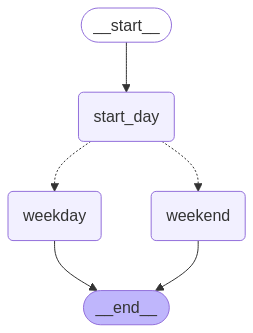

In [18]:
from IPython.display import Image,display
from langgraph.graph import StateGraph,START,END

## Build the Graph
graph=StateGraph(State)

## Add all the nodes
graph.add_node("start_day",start_day)
graph.add_node("weekday",weekday)
graph.add_node("weekend",weekend)

## Schedule the flow of the graph
graph.add_edge(START,"start_day")
graph.add_conditional_edges("start_day",random_day)
graph.add_edge("weekday",END)
graph.add_edge("weekend",END)

## Complie the graph
graph_builder = graph.compile()

## View
display(Image(graph_builder.get_graph().draw_mermaid_png()))

In [19]:
graph_builder.invoke({"graph_info":"My name is Karan, "})

Start Day node has been called
Weekend node has been called


{'graph_info': 'My name is Karan, I am planing to start the day🌻 😎🤣I am ready for the holiday, Yay!'}